In [3]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers, Sequential
from keras.layers import Flatten, Activation, Dropout, Dense, RepeatVector
from tensorflow.keras.layers import LSTM

In [4]:
"""
(a) (5 points) Implement a function to generate all pairs of query and answer. The
query includes two integer numbers (0˜99) and the an operation (+ or -), and the
answer includes correct results of the queries. You should have 100 × 100 × 2 =
20, 000 pairs of queries and answers. Please note that the lengths of queries and
answers are fixed as 5 and 4, respectively.
Data set
Query(X): ‘0+0 ’, ‘0-0 ’, ‘0+1 ’, ‘0-1 ’, ..., ‘99+99’, ‘99-99’
Answer(Y): ‘+0 ’, ‘+0 ’, ‘+1 ’, ‘-1 ’ ..., ‘+198’, ‘+0 ’
"""


def generate_data():

  queries = []
  answers = []
  for n1 in range(100):
    for n2 in range(100):

      # generate queries

      # spaces
      if n1 < 10 and n2 < 10:
        end_space = '  '
      elif (n1 < 10 and n2 >= 10) or (n1 >= 10 and n2 < 10):
        end_space = ' '
      else:
        end_space = ''
      

      q_add = str(n1) + '+' + str(n2) + end_space
      q_sub = str(n1) + '-' + str(n2) + end_space

      queries.append(q_add)
      queries.append(q_sub)
      

      # generate answers

      adds = n1 + n2
      subs = n1 - n2

      if adds < 10:
        space = '  '
      elif adds >= 10 and adds < 100:
        space = ' '
      else: 
        space = ''

      if abs(subs) < 10:
        space_s = '  '
      elif abs(subs) >= 10 and abs(subs) < 100:
        space_s = ' '
      else: 
        space_s = ''
       
      answers.append('+' + str(adds) + space)

      if subs >= 0:
        answers.append('+' + str(subs) + space_s)
      else:
        answers.append(str(subs) + space_s)   

     

  # # add blank space for answers if greater than 10 and 100
  queries = np.array(queries)
  answers = np.array(answers)

  return queries, answers
 



In [5]:
X,Y = generate_data()


In [6]:
"""
(b) (5 points) Implement a function to encode a string into one-hot-encoding scheme.
Please note that the dimensions of a queries and answers are fixed as 5 × 13 and
4 × 13, respectively.
alphabet = [‘0’,‘1’,‘2’,‘3’,‘4’,‘5’,‘6’,‘7’,‘8’,‘9’,‘+’,‘-’,‘ ’]
Encoding exmaple
‘4+27 ’
[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
‘+31 ’
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

"""

def one_hot_encoding(data, numbers):
  char_to_int = dict((c, i) for i, c in enumerate(numbers))
  int_to_char = dict((i, c) for i, c in enumerate(numbers))
  # integer encode input data
  integer_encoded = [char_to_int[char] for char in data]
  # one hot encode
  onehot_encoded = []
  for value in integer_encoded:
    letter = [0 for _ in range(len(numbers))]
    letter[value] = 1
    onehot_encoded.append(letter)
  return onehot_encoded

oh_X = []
oh_Y = []
numbers = '0123456789+- '
for x in X:
  oh_X.append(one_hot_encoding(x, numbers))

for y in Y:
  oh_Y.append(one_hot_encoding(y, numbers))

oh_X = np.array(oh_X)
oh_Y = np.array(oh_Y)



In [7]:
""" 
(c) (5 points) Implement a Encoder-Decoder LSTM network using the following code.
Explain how this code implements Encoder-Decoder scheme.
model = Sequential()
model.add(LSTM(?, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(?, return_sequences=True))
model.add(Dense(13, activation=‘softmax’))
"""


model = Sequential()
model.add(LSTM(14, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(25, return_sequences=True))
model.add(Dense(13, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14)                1568      
                                                                 
 repeat_vector (RepeatVector  (None, 4, 14)            0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 4, 25)             4000      
                                                                 
 dense (Dense)               (None, 4, 13)             338       
                                                                 
Total params: 5,906
Trainable params: 5,906
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
(d) (5 points) Shuffle the data set, and use 70% samples as the training set, 15% as
the validation set, and 15% as the test set. Train the network and tune the hyperparameters, then report the best test accuracy and its setting.
"""



oh_X, oh_Y = shuffle(oh_X, oh_Y)
print(oh_X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(oh_X, oh_Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.5, random_state=42)
print(X_test.shape, X_val.shape)

(20000, 5, 13)
(14000, 5, 13) (6000, 5, 13)
(3000, 5, 13) (3000, 5, 13)


In [10]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))


Epoch 1/20
438/438 [==============================] - 6s 9ms/step - loss: 0.7593 - accuracy: 0.7129 - val_loss: 0.7685 - val_accuracy: 0.7015
Epoch 2/20
438/438 [==============================] - 4s 9ms/step - loss: 0.7572 - accuracy: 0.7110 - val_loss: 0.7529 - val_accuracy: 0.7114
Epoch 3/20
438/438 [==============================] - 3s 7ms/step - loss: 0.7615 - accuracy: 0.7103 - val_loss: 0.7773 - val_accuracy: 0.7089
Epoch 4/20
438/438 [==============================] - 3s 6ms/step - loss: 0.7770 - accuracy: 0.7060 - val_loss: 0.7956 - val_accuracy: 0.6961
Epoch 5/20
438/438 [==============================] - 3s 6ms/step - loss: 0.9475 - accuracy: 0.6614 - val_loss: 0.8858 - val_accuracy: 0.6753
Epoch 6/20
438/438 [==============================] - 3s 6ms/step - loss: 0.8249 - accuracy: 0.6896 - val_loss: 0.7903 - val_accuracy: 0.7039
Epoch 7/20
438/438 [==============================] - 3s 6ms/step - loss: 0.8152 - accuracy: 0.6944 - val_loss: 0.7900 - val_accuracy: 0.7044
Epoch 

In [13]:
model.evaluate(X_test, Y_test)

94/94 [==============================] - 0s 4ms/step - loss: 1.4354 - accuracy: 0.5199


[1.4354395866394043, 0.5199166536331177]

In [14]:
print(history.history['accuracy'][-1])

0.5098035931587219


In [15]:
# model 2
model2 = Sequential()
model2.add(LSTM(40, input_shape=(5, 13), return_sequences=False))
model2.add(RepeatVector(4))
model2.add(LSTM(50, return_sequences=True))
model2.add(Dense(13, activation='softmax'))
model2.summary()

model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
history = model2.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))
model2.evaluate(X_test, Y_test)
print(history.history['accuracy'][-1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 40)                8640      
                                                                 
 repeat_vector_1 (RepeatVect  (None, 4, 40)            0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 4, 50)             18200     
                                                                 
 dense_1 (Dense)             (None, 4, 13)             663       
                                                                 
Total params: 27,503
Trainable params: 27,503
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
438/438 [==============================] - 6s 8ms/step - loss: 1.1649 - accuracy: 0.5820 - val_loss: 0.99

In [20]:
# model 3
model3 = Sequential()
model3.add(LSTM(30, input_shape=(5, 13), return_sequences=False))
model3.add(RepeatVector(4))
model3.add(LSTM(25, return_sequences=True))
model3.add(Dense(13, activation='softmax'))
model3.summary()

model3.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
history = model3.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))
model3.evaluate(X_test, Y_test)
val_accuracy = history.history['val_accuracy']

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30)                5280      
                                                                 
 repeat_vector_6 (RepeatVect  (None, 4, 30)            0         
 or)                                                             
                                                                 
 lstm_13 (LSTM)              (None, 4, 25)             5600      
                                                                 
 dense_6 (Dense)             (None, 4, 13)             338       
                                                                 
Total params: 11,218
Trainable params: 11,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
438/438 [==============================] - 6s 8ms/step - loss: 1.2990 - accuracy: 0.5438 - val_loss: 1.08

Model with best val accuracy = Model 3  
Best val accuracy = 0.9760

Model Settings:
_________________________________________________________________  
 Layer (type)                Output Shape              Param #   
=================================================================    
 lstm_2 (LSTM)               (None, 30)                5280      
                                                                 
 repeat_vector_1 (RepeatVect  (None, 4, 30)            0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 4, 25)             5600      
                                                                 
 dense_1 (Dense)             (None, 4, 13)             338       
                                                                 
=================================================================  
Total params: 11,218
Trainable params: 11,218
Non-trainable params: 0

In [21]:
"""
(e) (5 points) Reverse the query and answer strings in the data set, then repeat training
with the settings of best test accuracy of (d).
‘4+27 ’ -> ‘ 72+4’
‘+31 ’ -> ‘ 13+’
"""
def reverse(x):
  return x[::-1]

X_rev = []
Y_rev = []

for q in X:
  X_rev.append(reverse(q))

for a in Y:
  Y_rev.append(reverse(a))

oh_X_rev = []
oh_Y_rev = []

for x in X_rev:
  oh_X_rev.append(one_hot_encoding(x, numbers))

for y in Y_rev:
  oh_Y_rev.append(one_hot_encoding(y, numbers))

oh_X_rev = np.array(oh_X_rev)
oh_Y_rev = np.array(oh_Y_rev)

oh_X_rev, oh_Y_rev = shuffle(oh_X_rev, oh_Y_rev)
print(oh_X_rev.shape)
X_train_rev, X_test_rev, Y_train_rev, Y_test_rev = train_test_split(oh_X_rev, oh_Y_rev, test_size=0.3, random_state=42)
print(X_train_rev.shape, X_test_rev.shape)
X_test_rev, X_val_rev, Y_test_rev, Y_val_rev = train_test_split(X_test_rev, Y_test_rev, test_size = 0.5, random_state=42)
print(X_test_rev.shape, X_val_rev.shape)

(20000, 5, 13)
(14000, 5, 13) (6000, 5, 13)
(3000, 5, 13) (3000, 5, 13)


In [22]:
"""
(f) (5 points) With the setting of the best test(valid) accuracy, draw the chart of valid
accuracy vs. epoch for both non-reverse(baseline) and reverse data set as shown
in Figure 1. You can set validataion data=val data on model.fit() for this.
(Actual numbers might be different.)
"""

history = model3.fit(X_train_rev, Y_train_rev, epochs=20, validation_data=(X_val_rev, Y_val_rev))
model3.evaluate(X_test_rev, Y_test_rev)

val_accuracy_rev = history.history['val_accuracy']

Epoch 1/20
438/438 [==============================] - 3s 7ms/step - loss: 1.8256 - accuracy: 0.5126 - val_loss: 0.9343 - val_accuracy: 0.6693
Epoch 2/20
438/438 [==============================] - 3s 6ms/step - loss: 0.7490 - accuracy: 0.7219 - val_loss: 0.6218 - val_accuracy: 0.7770
Epoch 3/20
438/438 [==============================] - 3s 6ms/step - loss: 0.5285 - accuracy: 0.8144 - val_loss: 0.4629 - val_accuracy: 0.8388
Epoch 4/20
438/438 [==============================] - 3s 6ms/step - loss: 0.4108 - accuracy: 0.8602 - val_loss: 0.3788 - val_accuracy: 0.8750
Epoch 5/20
438/438 [==============================] - 3s 6ms/step - loss: 0.3280 - accuracy: 0.8941 - val_loss: 0.3273 - val_accuracy: 0.8916
Epoch 6/20
438/438 [==============================] - 3s 6ms/step - loss: 0.2754 - accuracy: 0.9129 - val_loss: 0.2580 - val_accuracy: 0.9204
Epoch 7/20
438/438 [==============================] - 3s 6ms/step - loss: 0.2400 - accuracy: 0.9263 - val_loss: 0.2660 - val_accuracy: 0.9093
Epoch 

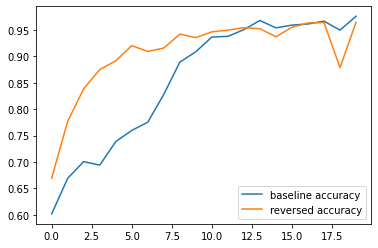

In [23]:
import matplotlib.pyplot as plt

epochs = [x for x in range(20)]
plt.plot(epochs, val_accuracy, label='baseline accuracy')
plt.plot(epochs, val_accuracy_rev, label='reversed accuracy')
plt.legend()
plt.show()